In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
precios=pd.read_csv('Precios_2019.csv')

In [66]:
precios.head(2)

,FECHA,1A_AAPL_*,1A_ADAP_*,1A_ADBE_*,1A_ADSK_*,1A_AMZN_*,1A_ANSS_*,1A_ATHM_N,1A_ATVI_*,1A_AVGO_*,...,1A_TENCH_N,1A_TSU_N,1A_TYL_*,1A_V_*,1A_VIPS_N,1A_VOD_N,1A_WB_N,1A_WNS_N,1A_WPP_N,1A_ZAL_N
0,1/2/2019,3093.305376,2549.156292,4398.832246,2526.042688,30148.17061,2801.251278,1494.157384,921.214234,4965.703178,...,766.548136,315.363580,3569.680672,2603.610376,106.753510,386.271416,1154.504932,805.058580,209.935099,514.402283
1,1/3/2019,2787.961987,2474.637333,4229.294610,2389.149505,29416.44004,2698.748772,1460.155631,889.387128,4528.502008,...,763.702005,309.991413,3463.237399,2512.283349,103.526544,385.087372,1097.420581,774.684423,208.587430,543.849361


In [67]:
precios['FECHA']=pd.to_datetime(precios['FECHA'])

In [68]:
precios.set_index('FECHA', inplace=True)
precios=precios.pct_change()
precios.dropna(inplace=True)

In [69]:
precios.head(2)

,1A_AAPL_*,1A_ADAP_*,1A_ADBE_*,1A_ADSK_*,1A_AMZN_*,1A_ANSS_*,1A_ATHM_N,1A_ATVI_*,1A_AVGO_*,1A_BABA_N,...,1A_TENCH_N,1A_TSU_N,1A_TYL_*,1A_V_*,1A_VIPS_N,1A_VOD_N,1A_WB_N,1A_WNS_N,1A_WPP_N,1A_ZAL_N
FECHA,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.098711,-0.029233,-0.038542,-0.054193,-0.024271,-0.036592,-0.022756,-0.034549,-0.088044,-0.043672,...,-0.003713,-0.017035,-0.029819,-0.035077,-0.030228,-0.003065,-0.049445,-0.037729,-0.006419,0.057245
2019-01-04,0.036462,0.033644,0.042370,0.046482,0.043793,0.037504,0.038877,0.033692,0.003798,0.063671,...,0.011751,0.009117,0.013894,0.036852,0.067450,0.013767,0.087445,0.048623,0.014985,0.007931


In [70]:
from sklearn.cluster import KMeans
precios_t=precios.T
kmeans=KMeans(n_clusters=4)
clusters=kmeans.fit(precios)
preds=clusters.fit_predict(precios)


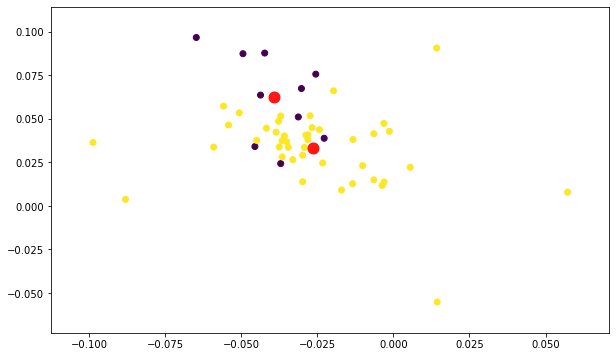

In [71]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(precios_t)
y_pred = kmeans.predict(precios_t)

plt.figure(figsize=(10,6))
plt.scatter(np.array(precios_t)[:,0], np.array(precios_t)[:,1], c=y_pred, cmap="viridis_r") 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=120, alpha=0.9)


plt.show();


In [72]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [73]:
len(kmeans.labels_)

54

In [74]:
precios_t['cluster']=kmeans.labels_

In [75]:
precios_t[precios_t.cluster==1]


FECHA,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-07 00:00:00,2019-01-08 00:00:00,2019-01-09 00:00:00,2019-01-10 00:00:00,2019-01-11 00:00:00,2019-01-14 00:00:00,2019-01-15 00:00:00,2019-01-16 00:00:00,...,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00,cluster
1A_ATHM_N,-0.022756,0.038877,-0.003087,-0.012031,0.051778,0.007613,-0.054186,-0.143451,0.010234,0.023350,...,0.034979,-0.008382,-0.009386,0.030233,-0.000592,0.007501,-0.017657,-0.000261,-0.017036,1
1A_BABA_N,-0.043672,0.063671,0.015071,0.027225,0.029476,-0.005364,-0.004926,-0.019593,0.012876,0.023288,...,0.010753,0.001136,0.007389,0.013504,-0.001295,0.008840,-0.009425,-0.010439,-0.004253,1
1A_BIDU_N,-0.045522,0.034120,0.001471,0.006330,0.014436,0.006367,-0.015766,-0.024557,0.032186,0.007924,...,0.025052,0.011415,-0.007190,0.011857,-0.001280,-0.008119,-0.014052,0.000192,0.000420,1
1A_BITA_N,-0.037041,0.024346,0.000447,-0.032298,0.011044,-0.014095,-0.018280,-0.027105,0.003097,0.009390,...,0.001329,-0.000809,-0.011277,-0.000678,0.001362,-0.008414,-0.008602,0.000780,0.006331,1
1A_GDS_N,-0.064783,0.096760,0.047193,0.028123,0.047610,0.021483,0.016711,-0.038981,0.050628,0.030343,...,0.022523,0.002857,-0.007522,-0.000624,0.005480,-0.003577,0.005455,-0.005320,0.004027,1
1A_JD_N,-0.042301,0.087813,0.013120,0.009762,0.026786,-0.016050,-0.024660,-0.042617,0.011616,0.000703,...,-0.005228,0.010394,0.012524,0.028273,0.001915,-0.002145,-0.013751,-0.013313,-0.005250,1
1A_MOMO_N,-0.031256,0.051113,0.022909,0.015916,0.015280,-0.009359,-0.003232,-0.021232,0.016022,0.027468,...,-0.008851,-0.043543,-0.001247,0.006196,0.005633,-0.001044,-0.028055,-0.012180,-0.016307,1
1A_SINA_N,-0.025515,0.075713,0.024994,-0.028653,0.034088,-0.006837,-0.023455,-0.044901,0.012548,0.033154,...,0.013391,-0.000792,0.004379,0.010708,-0.004572,0.001286,-0.028136,-0.014180,0.073192,1
1A_VIPS_N,-0.030228,0.067450,0.033269,0.025125,0.012798,-0.041049,0.007600,-0.031017,0.014079,0.037610,...,-0.007789,-0.019916,0.036761,-0.000053,0.013151,-0.002412,-0.010014,-0.001989,-0.021174,1
1A_WB_N,-0.049445,0.087445,0.013974,-0.055359,0.020978,-0.021104,-0.043840,-0.056588,0.010200,0.044182,...,0.018564,0.004207,-0.003105,0.020168,0.003275,0.010805,-0.019818,-0.014072,-0.000235,1


In [76]:
precios_t.cluster.value_counts()

0    44
1    10
Name: cluster, dtype: int64

In [48]:
precios_t.reset_index(inplace=True)

In [71]:
precios_t=precios_t.T

In [72]:
precios_t['cluster']=kmeans.labels_

In [75]:
precios_t.reset_index(inplace=True)

In [76]:
precios_t=precios_t[['index','cluster']]

0    43
1    11
Name: cluster, dtype: int64

In [80]:
precios_t[precios_t.cluster==2]

FECHA,index,cluster
2,1A_JD_N,2
4,1A_VIPS_N,2
9,1A_ATHM_N,2
10,1A_BABA_N,2
11,1A_BIDU_N,2
16,1A_MOMO_N,2
18,1A_NTES_N,2
21,1A_SINA_N,2
24,1A_WB_N,2
29,1A_GDS_N,2


In [84]:
precios_t[precios_t.cluster==3]

FECHA,index,cluster
20,1A_SHOP_N,3
31,1A_ADBE_*,3
32,1A_ADSK_*,3
33,1A_ANSS_*,3
37,1A_DOCU_*,3
39,1A_PAYC_*,3
40,1A_PTC_*,3
41,1A_PYPL_*,3
43,1A_SNPS_*,3
45,1A_CRM_*,3


In [83]:
precios_t.to_csv('clusters.csv')